# Women vs. men

In [33]:
import matplotlib.pyplot as plt

import file_processing_EIT
import file_processing_NMT

Simple function for visualisation.

In [34]:
def plot_graphic(df):
    df_t = df.set_index('Sex').T
    df_t.columns = ['жіноча', 'чоловіча']
    df_t['Subject'] = df_t.index

    subjects = df_t['Subject']
    men_scores = df_t['чоловіча']
    women_scores = df_t['жіноча']

    plt.figure(figsize=(14, 8))
    bar_width = 0.35
    index = range(len(subjects))

    bars1 = plt.bar(index, men_scores, bar_width, label='Men', color='#4E79A7', edgecolor='black')
    bars2 = plt.bar([i + bar_width for i in index], women_scores, bar_width, label='Women', color='#F28E2B', edgecolor='black')

    plt.xlabel('Subject', size=14)
    plt.ylabel('Average score', size=14)
    plt.xticks([i + bar_width / 2 for i in index], subjects, rotation=45, size=15)
    plt.legend()

    for bars in [bars1, bars2]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2,
                yval + 1,
                round(yval, 1),
                ha='center',
                fontsize=8,
                color='black')

    plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=0)
    plt.tight_layout()
    plt.show()

Group by gender and took median for each subject.

In [35]:
eit = file_processing_EIT.EIT
nmt = file_processing_NMT.NMT

eit_subjects = file_processing_EIT.grades_only
nmt_subjects = file_processing_NMT.grades_only

comparison_eit = eit.groupby('Sex', as_index=False)[eit_subjects].median()
comparison_nmt = nmt.groupby('Sex', as_index=False)[nmt_subjects].median()

Split EIT to two datasets, for simplifying visualisations.

In [36]:
applied_cols = [col for col in comparison_eit.columns if 'Applied' in col]
regular_cols = [col for col in comparison_eit.columns if 'Applied' not in col]

eit_df_applied = comparison_eit[['Sex'] + applied_cols]
eit_df_regular = comparison_eit[['Sex'] + regular_cols]

## NMT comparison by subject

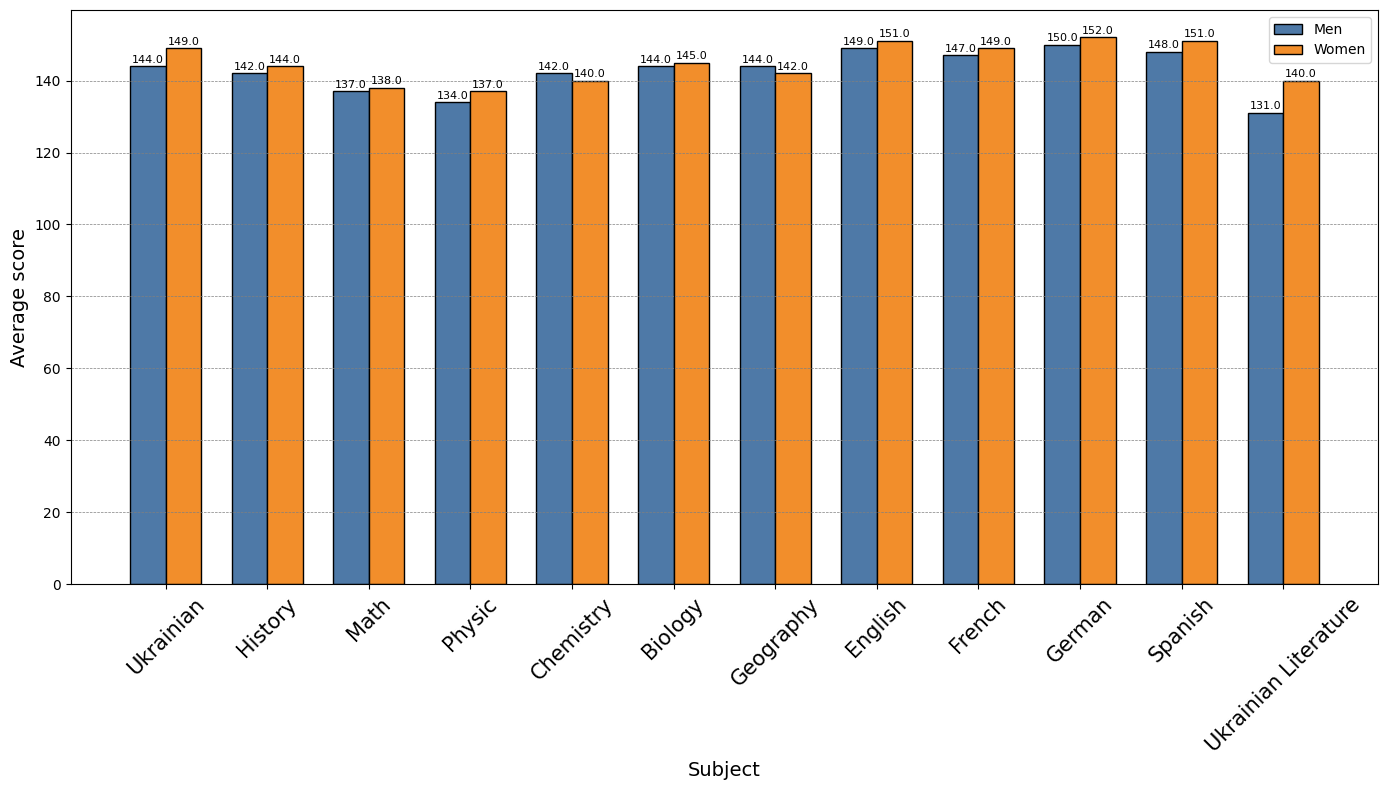

In [37]:
plot_graphic(comparison_nmt)

## EIT comparison by subject

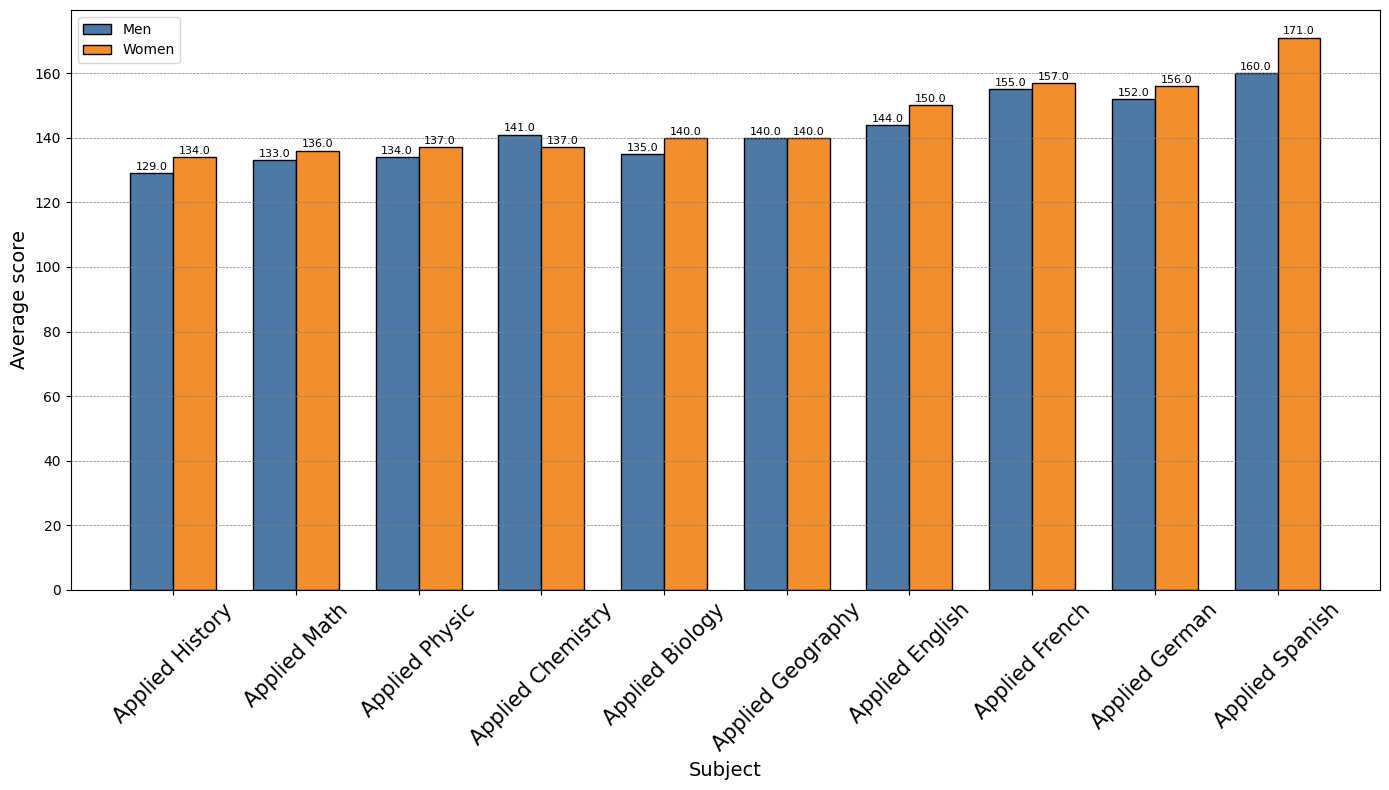

In [38]:
plot_graphic(eit_df_applied)

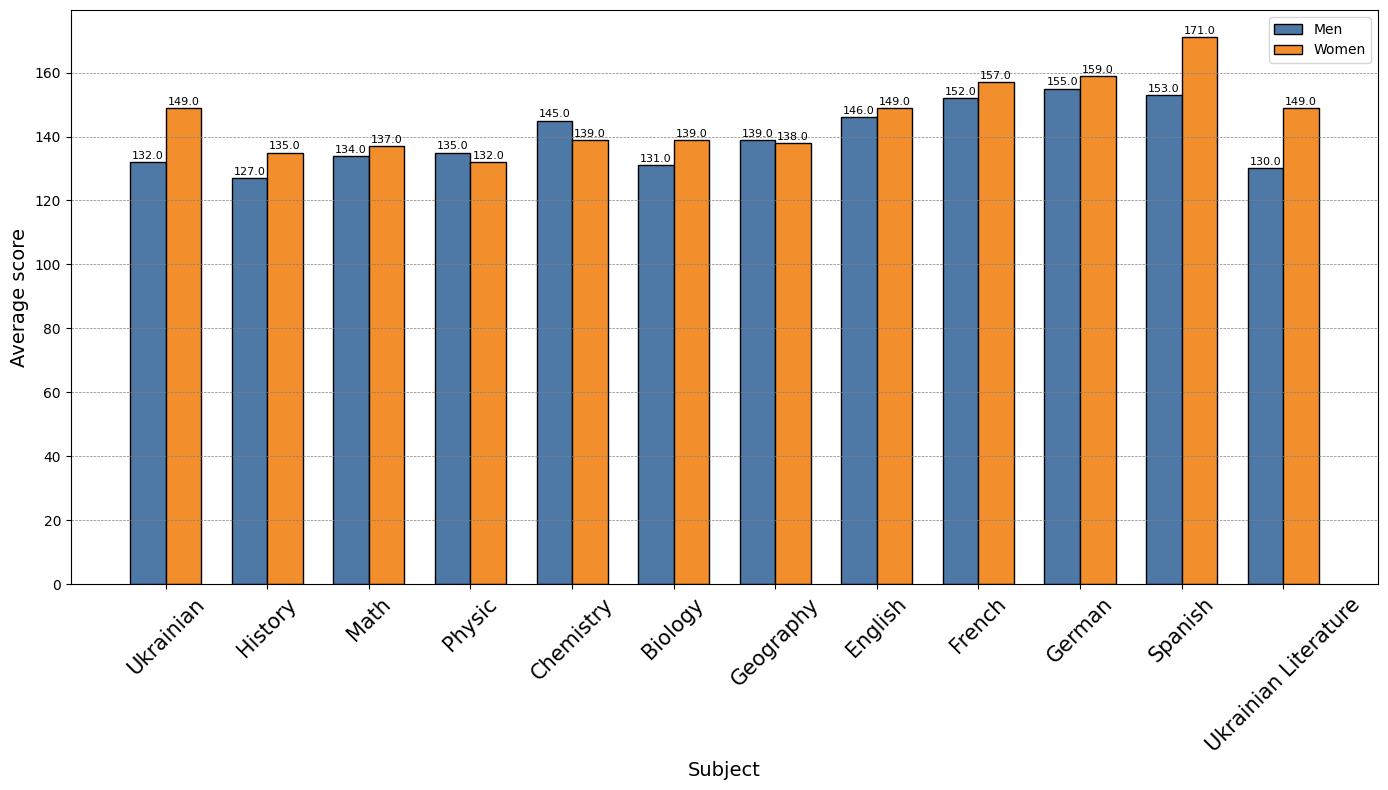

In [39]:
plot_graphic(eit_df_regular)